In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
data = pd.read_csv(r'Mall_Customers.txt' , sep = ',')

# K-MEANS CLUSTERING

In [3]:
import warnings
import mglearn

In [4]:
warnings.filterwarnings('ignore')

### Mglearn

**Visualise the working of any machine learning algoritm**

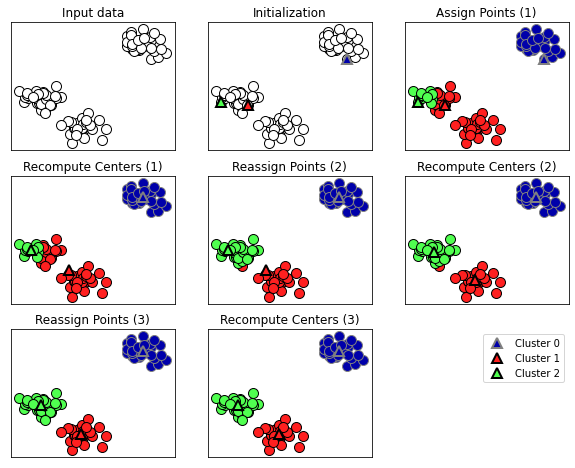

In [6]:
mglearn.plots.plot_kmeans_algorithm()

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.shape

(200, 5)

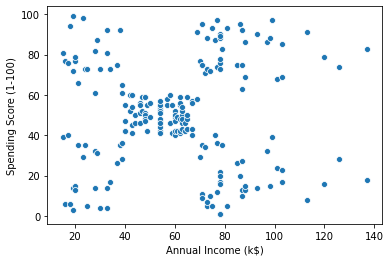

In [17]:
sns.scatterplot(data['Annual Income (k$)'] , data['Spending Score (1-100)'])

## ELBOW METHOD

#### To Decide how many clusters are there in the data....to get the K value
#### calculates the WITHIN-CLUSTER-SUM of SQUARED ERRORS (WCSS) for different values of K , & choose the K for which 
#### WCSS becomes 1st to diminish.In the plot of WCSS vs K .....it looks like elbow

In [18]:
x = data.loc[: , ['Annual Income (k$)','Spending Score (1-100)']].values

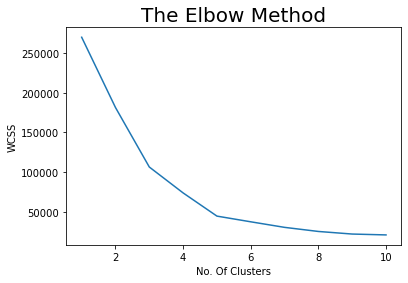

In [19]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1 , 11):
    km = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1 , 11) , wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.show()

**we have two elbow points in the graph....one at 3 and other at 5....if more than one elbow point is present,**
**we consider the last elbow point......here it is 5**

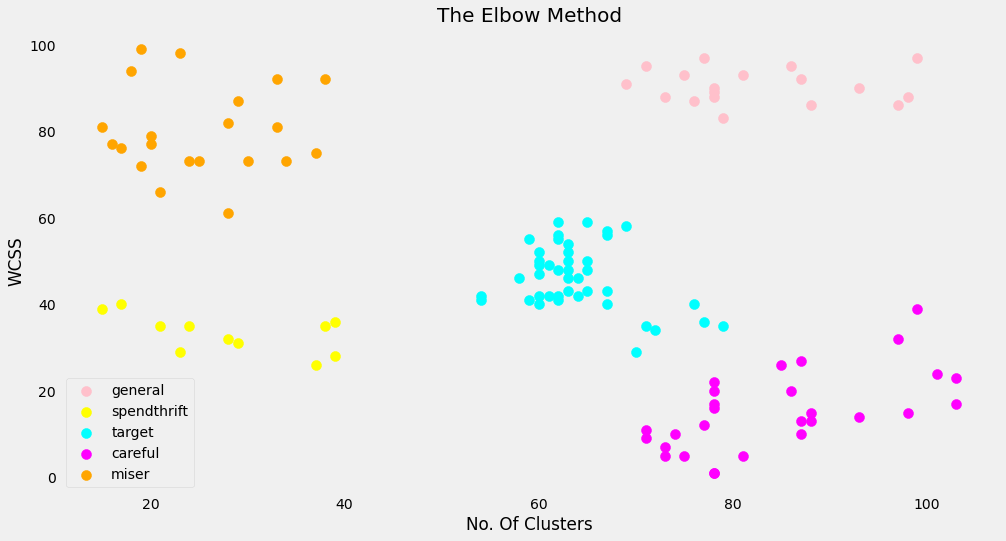

In [31]:
km = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
y_means = km.fit_predict(x)

plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('fivethirtyeight')

plt.scatter(x[y_means == 0,0] , x[y_means == 0,1] , s= 100 , c = 'pink' , label = 'general')
plt.scatter(x[y_means == 1,0] , x[y_means == 1,1] , s= 100 , c = 'yellow' , label = 'spendthrift')
plt.scatter(x[y_means == 2,0] , x[y_means == 2,1] , s= 100 , c = 'cyan' , label = 'target')
plt.scatter(x[y_means == 3,0] , x[y_means == 3,1] , s= 100 , c = 'magenta' , label = 'careful')
plt.scatter(x[y_means == 4,0] , x[y_means == 4,1] , s= 100 , c = 'orange' , label = 'miser')

plt.style.use('fivethirtyeight')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid()
plt.show()

# ANALYZE THE CLUSTER

### SILHOUETTE VALUES

#### +1 = sample is far away from from its neighbouring cluster , very close to cluster assigned
#### -1 = point is close to its neighbouring cluster than its assigned cluster
#### 0 = its at the boundary of the distance between the two clusters

In [50]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x , km.labels_ , metric = 'euclidean')  # uses euclidean method to distance btwn 2 points
score

0.4492169169017592

In [48]:
km.labels_

array([1, 4, 7, 4, 1, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 1, 4, 1, 4, 1, 4,
       7, 4, 7, 4, 1, 4, 1, 4, 7, 4, 7, 4, 7, 4, 7, 4, 1, 4, 1, 4, 1, 6,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 6, 6, 6, 6, 6,
       6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 5, 2, 0, 3, 5, 3, 5,
       2, 5, 3, 0, 3, 5, 3, 5, 3, 0, 2, 0, 3, 0, 2, 5, 3, 0, 3, 0, 3, 5,
       3, 0, 3, 5, 3, 5, 2, 0, 3, 0, 3, 5, 3, 0, 3, 5, 3, 5, 3, 0, 3, 0,
       3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 8, 3, 8, 3, 8, 9, 8, 9, 8, 9, 8,
       9, 8])

### Visualise the silhouette

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

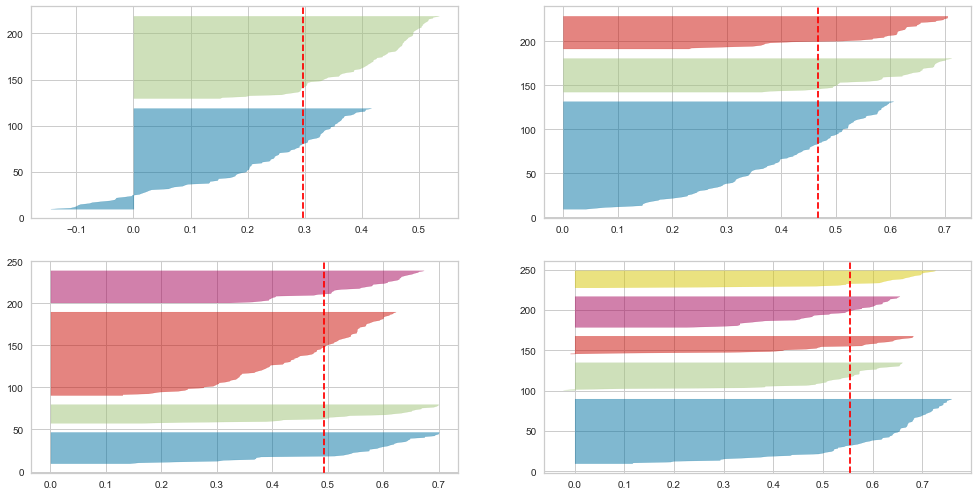

In [54]:
fig , ax = plt.subplots(2,2 ,figsize = (15,8))

for i in [2,3,4,5]:
    km = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 2)
    q , mod = divmod(i , 2)
    
    visualizer = SilhouetteVisualizer(km , colors = 'yellowbrick' , ax = ax[q-1][mod])
    visualizer.fit(x)

**Above graph shows silhouette scores for 2,3,4,5 clusters**

# CLUSTERING FOR MULTI DIMENSIONS

#### Clustering can be done on any number of features , But only 2 , 3 features can be visualised

In [65]:
x = data.loc[: , ['Age','Annual Income (k$)','Spending Score (1-100)']].values

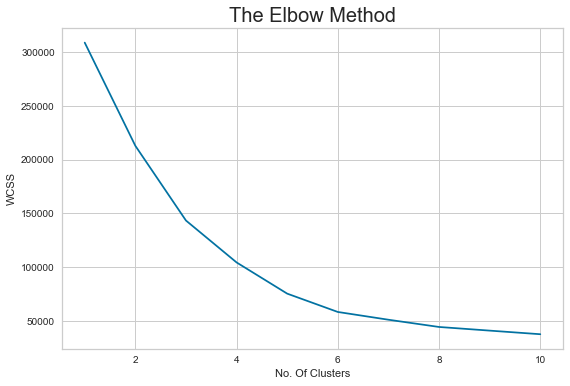

In [67]:
wcss = []

for i in range(1 , 11):
    km = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1 , 11) , wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
km = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
y_means = km.fit_predict(x)

# plt.rcParams['figure.figsize'] = (15,8)
# plt.style.use('fivethirtyeight')

# plt.scatter(x[y_means == 0,0] , x[y_means == 0,1] , s= 100 , c = 'pink' , label = 'general')
# plt.scatter(x[y_means == 1,0] , x[y_means == 1,1] , s= 100 , c = 'yellow' , label = 'spendthrift')
# plt.scatter(x[y_means == 2,0] , x[y_means == 2,1] , s= 100 , c = 'cyan' , label = 'target')
# plt.scatter(x[y_means == 3,0] , x[y_means == 3,1] , s= 100 , c = 'magenta' , label = 'careful')
# plt.scatter(x[y_means == 4,0] , x[y_means == 4,1] , s= 100 , c = 'orange' , label = 'miser')

# plt.style.use('fivethirtyeight')
# plt.title('The Elbow Method', fontsize = 20)
# plt.xlabel('No. Of Clusters')
# plt.ylabel('WCSS')
# plt.legend()
# plt.grid()
# plt.show()

In [69]:
y_means = pd.DataFrame(y_means)
df = pd.concat([data , y_means] , axis = 1)
df = df.rename(columns = {0:'Clusters'})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,5
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,5


In [70]:
print("customer id for cluster 1: " , df[df['Clusters'] == 0]['CustomerID'].values)
print("customer id for cluster 2: " , df[df['Clusters'] == 1]['CustomerID'].values)
print("customer id for cluster 3: " , df[df['Clusters'] == 2]['CustomerID'].values)
print("customer id for cluster 4: " , df[df['Clusters'] == 3]['CustomerID'].values)
print("customer id for cluster 5: " , df[df['Clusters'] == 4]['CustomerID'].values)
print("customer id for cluster 6: " , df[df['Clusters'] == 5]['CustomerID'].values)

customer id for cluster 1:  [129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165 167
 169 171 173 175 177 179]
customer id for cluster 2:  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 30 32 34 36 38 40 42 46]
customer id for cluster 3:  [180 182 184 186 188 190 192 194 196 198 200]
customer id for cluster 4:  [ 47  51  55  56  57  60  67  72  77  78  80  82  84  86  90  93  94  97
  99 102 105 108 113 118 119 120 122 123 127]
customer id for cluster 5:  [ 3  7  9 11 13 15 19 23 25 31 33 35 37 45]
customer id for cluster 6:  [ 1  5 17 21 27 28 29 39 43 44 48 49 50 52 53]


# HIERARCHICAL CLUSTERING

In [5]:
x = data.loc[: , ['Annual Income (k$)','Spending Score (1-100)']].values

## DENDROGRAMS

### shows hierarchical relationship between objects
### it is most commonly as an output from hierarchical clustering
### the main use of dendogram is to work out the best way to allocate objects to clusters

In [9]:
import scipy.cluster.hierarchy as sch

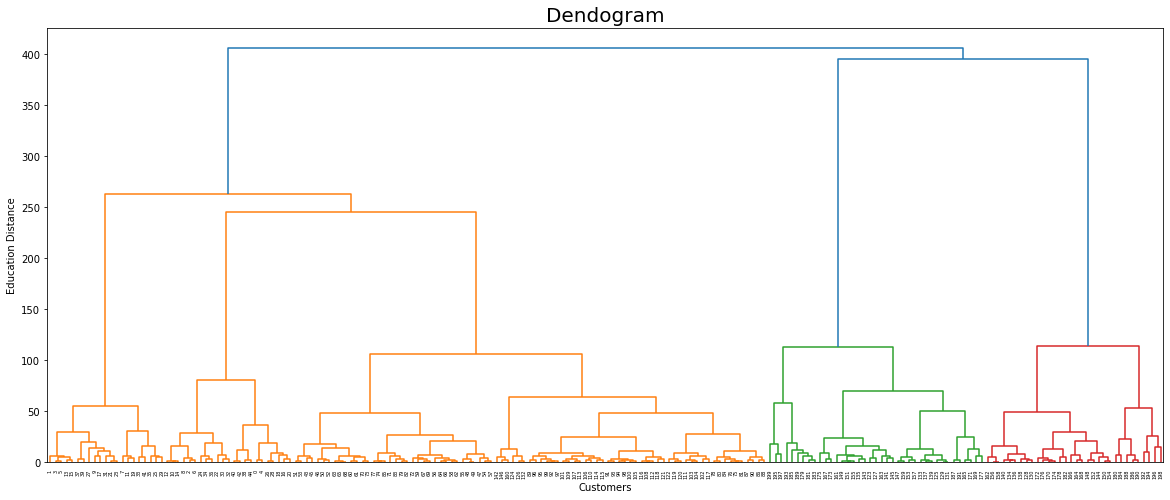

In [11]:
plt.rcParams['figure.figsize'] = (20,8)

dendogram = sch.dendrogram(sch.linkage(x , method = 'ward'))
plt.title('Dendogram' , fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Education Distance')
plt.show()

**horizontal line at 200 will cut 5 lines (3 orange 2 blue) is best......so we take 5 cluster value**

## 1) AGLOMARATIVE CLUSTERING

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5 , affinity = 'euclidean' , linkage = 'ward')
y_hc = hc.fit_predict(x)

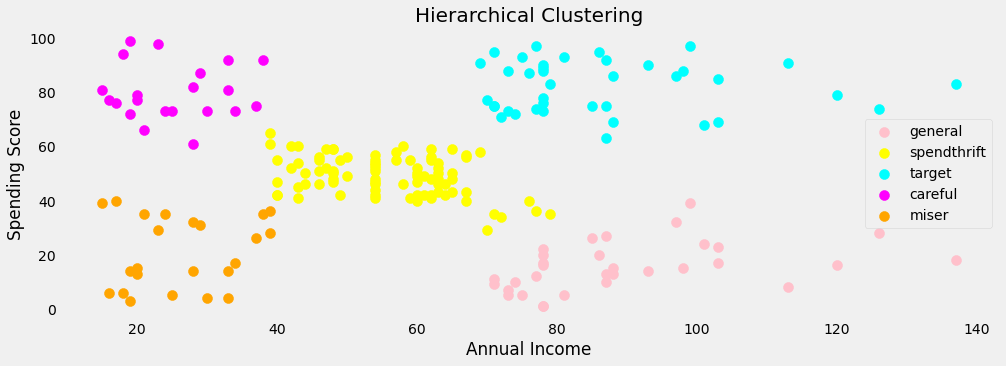

In [13]:
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

plt.scatter(x[y_hc == 0,0] , x[y_hc == 0,1] , s= 100 , c = 'pink' , label = 'general')
plt.scatter(x[y_hc == 1,0] , x[y_hc == 1,1] , s= 100 , c = 'yellow' , label = 'spendthrift')
plt.scatter(x[y_hc == 2,0] , x[y_hc == 2,1] , s= 100 , c = 'cyan' , label = 'target')
plt.scatter(x[y_hc == 3,0] , x[y_hc == 3,1] , s= 100 , c = 'magenta' , label = 'careful')
plt.scatter(x[y_hc == 4,0] , x[y_hc == 4,1] , s= 100 , c = 'orange' , label = 'miser')

plt.style.use('fivethirtyeight')
plt.title('Hierarchical Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# DBSCAN CLUSTERING

In [14]:
from sklearn.neighbors import NearestNeighbors

In [28]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(x)
distances , indices = nbrs.kneighbors(x)

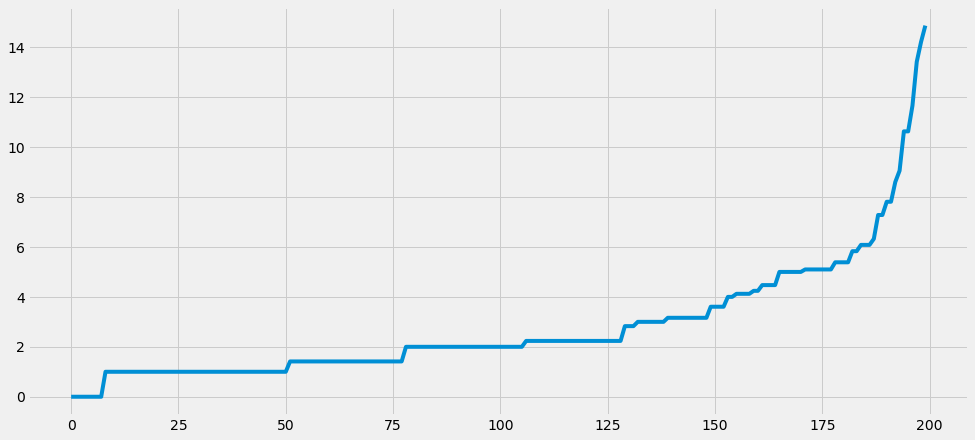

In [31]:
distances = np.sort(distances , axis = 0)
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(distances)
plt.show()

**epsilon value will be maximum curvature of the curve....around 8**

In [58]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 8
                , min_samples = 4)  

# if columns <= 2, min_samples = col_num , if more than 2 then min_samples = col_num*2
# since we have only 2 column , min_sample = 2

clusters = dbscan.fit_predict(x)

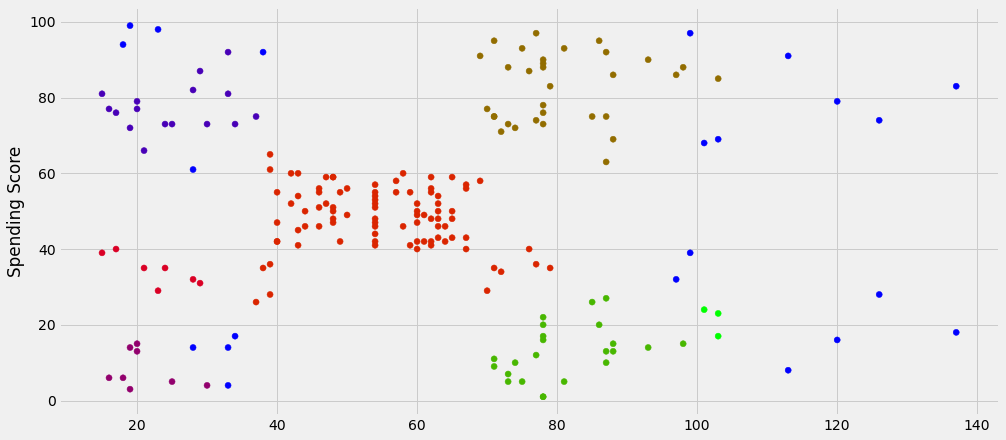

In [59]:
plt.scatter(x[: , 0] , x[: , 1] , c = clusters , cmap = 'brg')
plt.ylabel('Spending Score')
plt.show()

# EVALUATING CLUSTER MODEL

## Completeness Score

### A clsutering satisfies completeness if all the data points that are members of a given class are elements of same cluster
### Accuracy 1.0 if data belonging to same class belongs to same cluster , even if multiple classes belongs to same cluster

In [1]:
from sklearn.metrics.cluster import completeness_score

In [2]:
completeness_score(labels_true = [10,10,11,11] , labels_pred = [1,1,0,0])   # labels_true = values , labels_pred = cluster they belong to

1.0

In [4]:
completeness_score(labels_true = [10,11,11,10] , labels_pred = [1,0,1,1])

0.3836885465963443

In [5]:
completeness_score(labels_true = [10,10,11,11] , labels_pred = [0,0,0,0])

1.0

## Homogeneity Score

### A clustering result satisfies homogeneity if all of its cluster contain only data points which are members of a single cluster

In [6]:
from sklearn.metrics.cluster import homogeneity_score

In [7]:
homogeneity_score(labels_true = [0,0,1,1] , labels_pred = [1,1,0,0])

1.0

In [8]:
homogeneity_score(labels_true = [0,0,1,1] , labels_pred = [0,1,2,3])   # all labels have single cluster

0.9999999999999999

In [9]:
homogeneity_score(labels_true = [0,0,0,0] , labels_pred = [1,1,0,0])  # same class broken into two clusters

1.0

## Silhoutte Score
### Explained Above Already

## Calinski Harabaz Score

### The score is defined as ratio between the within cluster dispersion and between the cluster dispersion

In [12]:
from sklearn.metrics import calinski_harabasz_score

In [15]:
from sklearn.cluster import KMeans

In [20]:
range_n_clusters = [2,3,4,5,6]

In [22]:
for n_cluster in range_n_clusters:
    KM = KMeans(n_cluster)
    KM.fit(x)
    labels = KM.predict(x)
    print(n_cluster , calinski_harabasz_score(x , labels))

2 96.74654578369159
3 151.5570090006799
4 174.06443354336847
5 247.35899338037288
6 242.49215694460975
